In [1]:
import numpy as np
import pandas as pd
from perceptron import Perceptron
from adaline import ADALINE
import sklearn

In [2]:
iris_data_loc = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df= pd.read_csv(iris_data_loc, header=None, encoding='utf-8')

In [3]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [4]:
print(df[4].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
import sklearn.model_selection


df['setosa'] = (df[4] == 'Iris-setosa').astype(int)
print(df.info())
X = df.iloc[:, 0:3]
y = df.iloc[:, 5]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test.shape, X_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
 5   setosa  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
(30, 3) (120, 3)


In [32]:
perc = Perceptron()
perc.train(X_train, y_train)

ada = ADALINE()
ada.train(X_train, y_train, learning_rate= 0.1, iterations=1000)

c:\Users\sadit\miniconda3\envs\dataexercises\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\sadit\miniconda3\envs\dataexercises\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
d:\Primary Storage\Programming\Machine_Learning_Sebastian_Raschka\Perceptron\adaline.py:35: RuntimeWarning: invalid value encountered in scalar add
  self.b_ += self.eta * 2.0 * err.mean()


In [33]:
predictions_perc = perc.predict(X_test)
print(f"Prediction success rate is {np.sum(predictions_perc == y_test)/len(y_test) * 100} %")

predictions_ada = ada.predict(X_test)
print(f"Prediction success rate is {np.sum(predictions_ada == y_test)/len(y_test) * 100} %")

Prediction success rate is 100.0 %
Prediction success rate is 66.66666666666666 %


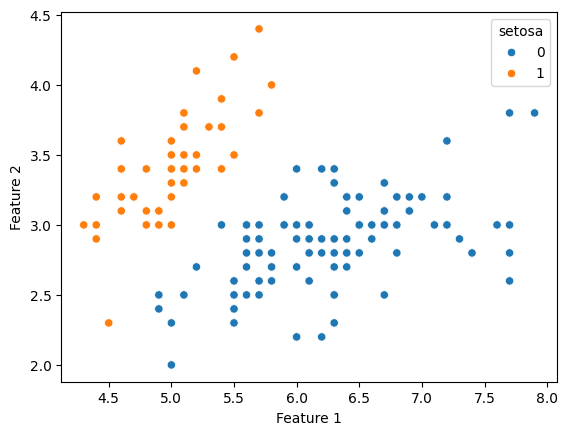

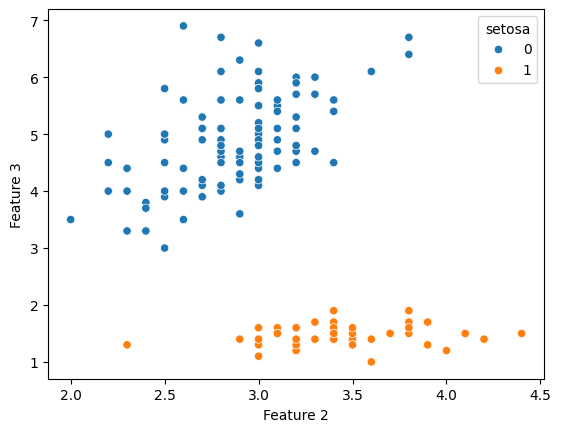

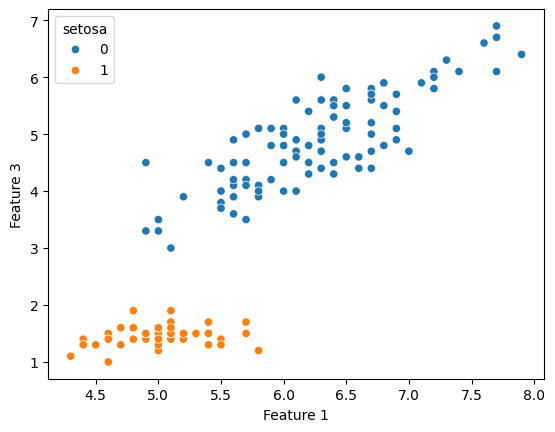

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x=0, y=1, hue='setosa', markers='setosa')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

sns.scatterplot(data=df, x=1, y=2, hue='setosa', markers='setosa')
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")
plt.show()

sns.scatterplot(data=df, x=0, y=2, hue='setosa', markers='setosa')
plt.xlabel("Feature 1")
plt.ylabel("Feature 3")
plt.show()

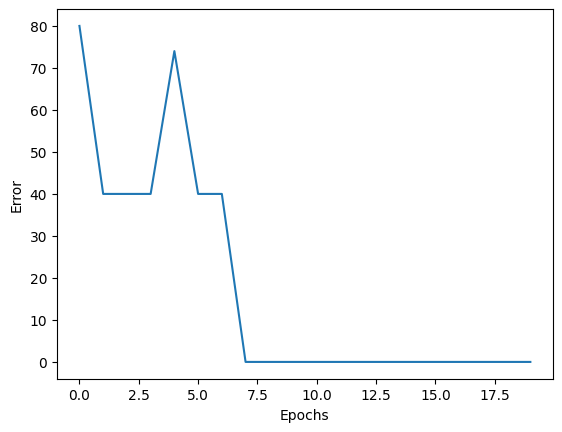

In [9]:
sns.lineplot(y=perc.errors_, x=np.arange(perc.epochs), markers='s', ms=10)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title
plt.show()

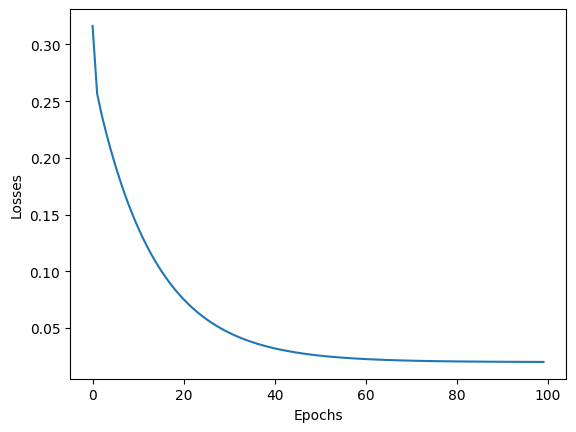

In [10]:
sns.lineplot(y=ada.losses, x=np.arange(ada.epochs), markers='s', ms=10)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title
plt.show()